In [0]:
import pandas as pd
import numpy as np

#from google.colab import drive
#drive.mount('/content/drive/')

! if [ ! -e kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv ] ; \
  then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv; \
fi

In [18]:
df = pd.read_csv("/content/kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv")
df = df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std'], axis = 1)

t1l1 = df.loc[(df.type == 1) & (df.level == 1)]
t1l1 = t1l1.assign(icv = sum(t1l1.volume))
t1l1 = t1l1.assign(tbv = sum(t1l1.volume[(t1l1.roi != 'CSF')]))
t1l1 = t1l1.assign(comp = lambda x: x.volume / x.tbv)
t1l1

roi  volume  type  level      icv      tbv      comp
0  Telencephalon_L  531111     1      1  1378295  1268519  0.418686
1  Telencephalon_R  543404     1      1  1378295  1268519  0.428377
2   Diencephalon_L    9683     1      1  1378295  1268519  0.007633
3   Diencephalon_R    9678     1      1  1378295  1268519  0.007629
4    Mesencephalon   10268     1      1  1378295  1268519  0.008094
5    Metencephalon  159402     1      1  1378295  1268519  0.125660
6   Myelencephalon    4973     1      1  1378295  1268519  0.003920
7              CSF  109776     1      1  1378295  1268519  0.086539

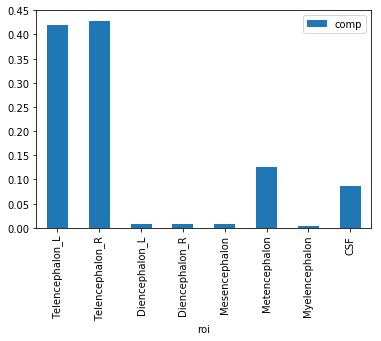

In [19]:
t1l1.plot.bar(x='roi',y='comp')

In [20]:
!pip install plotly==4.0.0
import plotly.express as px
myplot = px.bar(t1l1, x='roi', y='volume')
myplot.show()

     |████████████████████████████████| 6.8MB 35.7MB/s 
  Found existing installation: plotly 3.6.1
    Uninstalling plotly-3.6.1:
      Successfully uninstalled plotly-3.6.1
